In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Food-Truck-LineReg.csv",header=None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97 non-null     float64
 1   1       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.columns=["X","Y"]
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Y-->')

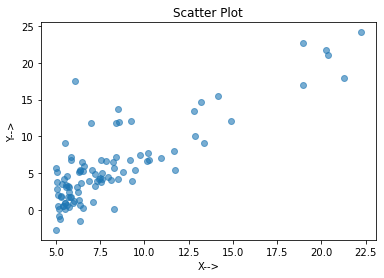

In [5]:
x,y=df["X"],df["Y"]
plt.scatter(x,y,alpha=0.6)
plt.title("Scatter Plot")
plt.xlabel("X-->")
plt.ylabel("Y-->")

0.837873232526341

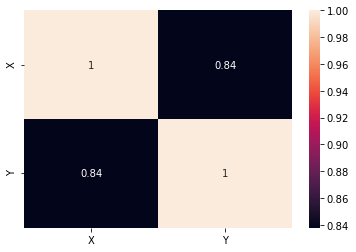

In [6]:
heatMap=sns.heatmap(df.corr(),annot=True)
df['Y'].corr(df['X'])

In [7]:
Xsquare=[]
Ysquare=[]
XY=[]
for i in range(len(df)):
    Xsquare.append(round(df.X[i]**2,4))
    Ysquare.append(round(df.Y[i]**2,4))
    XY.append(round(df.Y[i]*df.X[i],4))
df['Xsquare']=Xsquare
df['Ysquare']=Ysquare
df['XY']=XY
df.head()

,X,Y,Xsquare,Ysquare,XY
0,6.1101,17.5920,37.3333,309.4785,107.4889
1,5.5277,9.1302,30.5555,83.3606,50.4690
2,8.5186,13.6620,72.5665,186.6502,116.3811
3,7.0032,11.8540,49.0448,140.5173,83.0159
4,5.8598,6.8233,34.3373,46.5574,39.9832


In [8]:
sumX=round(df['X'].sum(),4)
sumY=round(df['Y'].sum(),4)
sumXsq=round(df['Xsquare'].sum(),4)
sumYsq=round(df['Ysquare'].sum(),4)
sumXY=round(df['XY'].sum(),4)
print(sumX,sumY,sumXsq,sumYsq,sumXY)

791.5006 566.3961 7896.1824 6222.1103 6336.8986


In [9]:
tempX=0
tempY=0
for i in range(len(df)):
    tempX=tempX+ (((df.X[i]-(sumX/len(df)))**2))
    tempY=tempY+ (((df.Y[i]-(sumY/len(df)))**2))

varianceX=tempX/len(df)
varianceY=tempY/len(df)
sdX=round((varianceX)**(1/2),4)
sdY=round((varianceY)**(1/2),4)
print(sdX,sdY)

3.8499 5.4818


In [10]:
regC=round((sumXY / (sumXsq * sumYsq)),5)
regC

0.00013

In [11]:
slopeM=round((regC*(sdY/sdX)),5)
slopeM

0.00019

In [12]:
C=round((sumY/len(df)) - slopeM * (sumX/len(df)), 5)
C

5.83758

In [13]:
predY=[]
for i in range(len(df)):
    predY.append(round((slopeM*df.X[i]+C),4))
df['predY']=predY
df.head()

,X,Y,Xsquare,Ysquare,XY,predY
0,6.1101,17.5920,37.3333,309.4785,107.4889,5.8387
1,5.5277,9.1302,30.5555,83.3606,50.4690,5.8386
2,8.5186,13.6620,72.5665,186.6502,116.3811,5.8392
3,7.0032,11.8540,49.0448,140.5173,83.0159,5.8389
4,5.8598,6.8233,34.3373,46.5574,39.9832,5.8387


In [14]:
predYsum= round((df['predY'].sum()),4)
sse=sumY/len(df)
sst=0
ssr=0
for i in range(len(df)):
    sse=sse + (((df.Y[i] - df.predY[i]))**2)
    ssr=ssr + ((df.predY[i] - (predYsum / len(df)))**2)
    sst=sst + ((df.Y[i] - (sumY / len(df)))**2)

cost=sse
rSquare=(ssr/sst)
rSquare2=1-(sse/sst)

print(cost, sse, ssr, sst, rSquare, rSquare2)

2920.0398954619473 2920.0398954619473 5.154329896907451e-05 2914.8470516572247 1.768302008840216e-08 -0.001781515020409019
